# Import Library

In [35]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

# 시작

In [36]:
cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('Data.csv', encoding='CP949')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
변경 후 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
현재 폴더 파일 :  ['Block perspective.csv', 'CHE I perspective.csv', 'CHE II perspective.csv', 'Container perspective.csv', 'Data.csv', 'DS.csv', 'DStoLD.csv', 'FULL', 'Gate perspective.csv', 'GI perspective.csv', 'GO perspective.csv', 'ITV perspective.csv', 'LD.csv', 'old', 'POD', 'QC perspective.csv', 'Vessel perspective.csv', '분포', '통합', '확인.csv']
feature 항목 :  Index(['Time_of_DS_MOVE', 'CONTAINER_NO', 'DS_VESSEL_ID', 'LD_VESSEL_ID',
       'DS_VESSEL_YEAR', 'LD_VESSEL_YEAR', 'LD_COUNTRY_POD', 'LD_CITY_POD',
       'Full_Empty', 'LD_BLOCK', 'LD_BAY', 'DS_BLOCK', 'DS_BAY', 'LD_CHE_ID',
       'LD_ITV_ID', 'LD_QC_ID', 'DS_CHE_ID', 'DS_ITV_ID', 'DS_QC_ID',
       'LD_QUEUE_POSITION_NUMBER', 'LD_QUEUE_POSITION_HACK_DACK', 'LD_H_BOX',
       'DS_QUEUE_POSITION_NUMBER', 'DS_QUEUE_POSITION_HACK_DACK', 'DS_H_BOX',
       'TML_OUT_DT', 'LD_DAY', 'DS_DAY', 'Dwell Time'],
      dtype='object')


,Time_of_DS_MOVE,CONTAINER_NO,DS_VESSEL_ID,LD_VESSEL_ID,DS_VESSEL_YEAR,LD_VESSEL_YEAR,LD_COUNTRY_POD,LD_CITY_POD,Full_Empty,LD_BLOCK,...,LD_QUEUE_POSITION_NUMBER,LD_QUEUE_POSITION_HACK_DACK,LD_H_BOX,DS_QUEUE_POSITION_NUMBER,DS_QUEUE_POSITION_HACK_DACK,DS_H_BOX,TML_OUT_DT,LD_DAY,DS_DAY,Dwell Time
0,456,TRLU,SFNZ,SFNZ,2018,2018,HK,HKG,F,3A,...,10,D,1018.0,21,D,1018.0,NaN,Thursday,Thursday,3707
1,476,TRLU,SFNZ,SFNZ,2018,2018,CN,NGB,M,3C,...,18,D,1018.0,24,D,1018.0,NaN,Thursday,Thursday,35029
2,237,TGHU,SFNZ,SFNZ,2018,2018,CN,SHA,M,2C,...,40,D,1018.0,32,D,1018.0,NaN,Thursday,Thursday,36648
3,576,TGHU,SFNZ,SFNZ,2018,2018,CN,NGB,M,1C,...,28,H,1018.0,10,D,1018.0,NaN,Thursday,Thursday,31494
4,855,TGHU,SFNZ,SFNZ,2018,2018,CN,NGB,M,3E,...,18,D,1018.0,21,D,1018.0,NaN,Thursday,Thursday,32909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24891,636,BMOU,MHAH,ALAP,2018,2018,US,SEA,F,3B,...,46,H,531.0,42,H,2720.0,1970-01-01 05:36:20.131233909,Wednesday,Sunday,256699
24892,851,BMOU,MAUO,ALAP,2018,2018,CA,VAN,F,1B,...,34,H,531.0,58,H,3464.0,1970-01-01 05:36:20.131204159,Wednesday,Saturday,347916
24893,957,BMOU,MAUO,ALAP,2018,2018,US,SEA,F,2B,...,46,H,531.0,18,H,3464.0,1970-01-01 05:36:20.131223402,Wednesday,Saturday,344666
24894,518,BMOU,MAUO,ALAP,2018,2018,US,SEA,F,3B,...,18,H,531.0,18,H,3464.0,1970-01-01 05:36:20.131222228,Wednesday,Saturday,345321


In [37]:
# dwell time이 음수인 항들은 제외
temp = list(data[data['Dwell Time'] < 0].index)

for index in temp :
    data.drop(index, axis=0, inplace=True)
print(data.shape)

data.reset_index(drop=True, inplace=True)

(24888, 29)


In [38]:
data.describe()

,Time_of_DS_MOVE,DS_VESSEL_YEAR,LD_VESSEL_YEAR,LD_QUEUE_POSITION_NUMBER,LD_H_BOX,DS_QUEUE_POSITION_NUMBER,DS_H_BOX,Dwell Time
count,24888.000000,24888.000000,24888.000000,24888.000000,24888.000000,24888.000000,24888.000000,2.488800e+04
mean,617.472236,2017.939208,2017.997911,34.225530,1746.887255,35.820275,2310.141313,4.527264e+05
std,279.472288,0.238954,0.045663,21.140828,1122.420753,21.109704,1055.049731,2.983673e+05
min,9.000000,2017.000000,2017.000000,1.000000,47.000000,1.000000,73.000000,1.400000e+02
25%,395.000000,2018.000000,2018.000000,18.000000,828.000000,18.000000,1510.000000,2.502425e+05
50%,631.000000,2018.000000,2018.000000,30.000000,1329.000000,34.000000,2632.000000,3.968220e+05
75%,769.000000,2018.000000,2018.000000,50.000000,2632.000000,50.000000,3262.000000,6.297168e+05
max,14215.000000,2018.000000,2018.000000,94.000000,4030.000000,90.000000,4030.000000,2.595729e+06


In [39]:
# Label Encodering
features = [x for x in data.columns if x not in ['Time of DS-QUAYSIDE', 'Time_of_DS_MOVE', 'Time of DS-YARDSIDE', "Dwell Time"]]
features

['CONTAINER_NO',
 'DS_VESSEL_ID',
 'LD_VESSEL_ID',
 'DS_VESSEL_YEAR',
 'LD_VESSEL_YEAR',
 'LD_COUNTRY_POD',
 'LD_CITY_POD',
 'Full_Empty',
 'LD_BLOCK',
 'LD_BAY',
 'DS_BLOCK',
 'DS_BAY',
 'LD_CHE_ID',
 'LD_ITV_ID',
 'LD_QC_ID',
 'DS_CHE_ID',
 'DS_ITV_ID',
 'DS_QC_ID',
 'LD_QUEUE_POSITION_NUMBER',
 'LD_QUEUE_POSITION_HACK_DACK',
 'LD_H_BOX',
 'DS_QUEUE_POSITION_NUMBER',
 'DS_QUEUE_POSITION_HACK_DACK',
 'DS_H_BOX',
 'TML_OUT_DT',
 'LD_DAY',
 'DS_DAY']

In [40]:
for feature in features:
    lbl_enc = preprocessing.LabelEncoder()
    data[feature] = lbl_enc.fit_transform(data[feature].fillna("-1").astype(str).values)

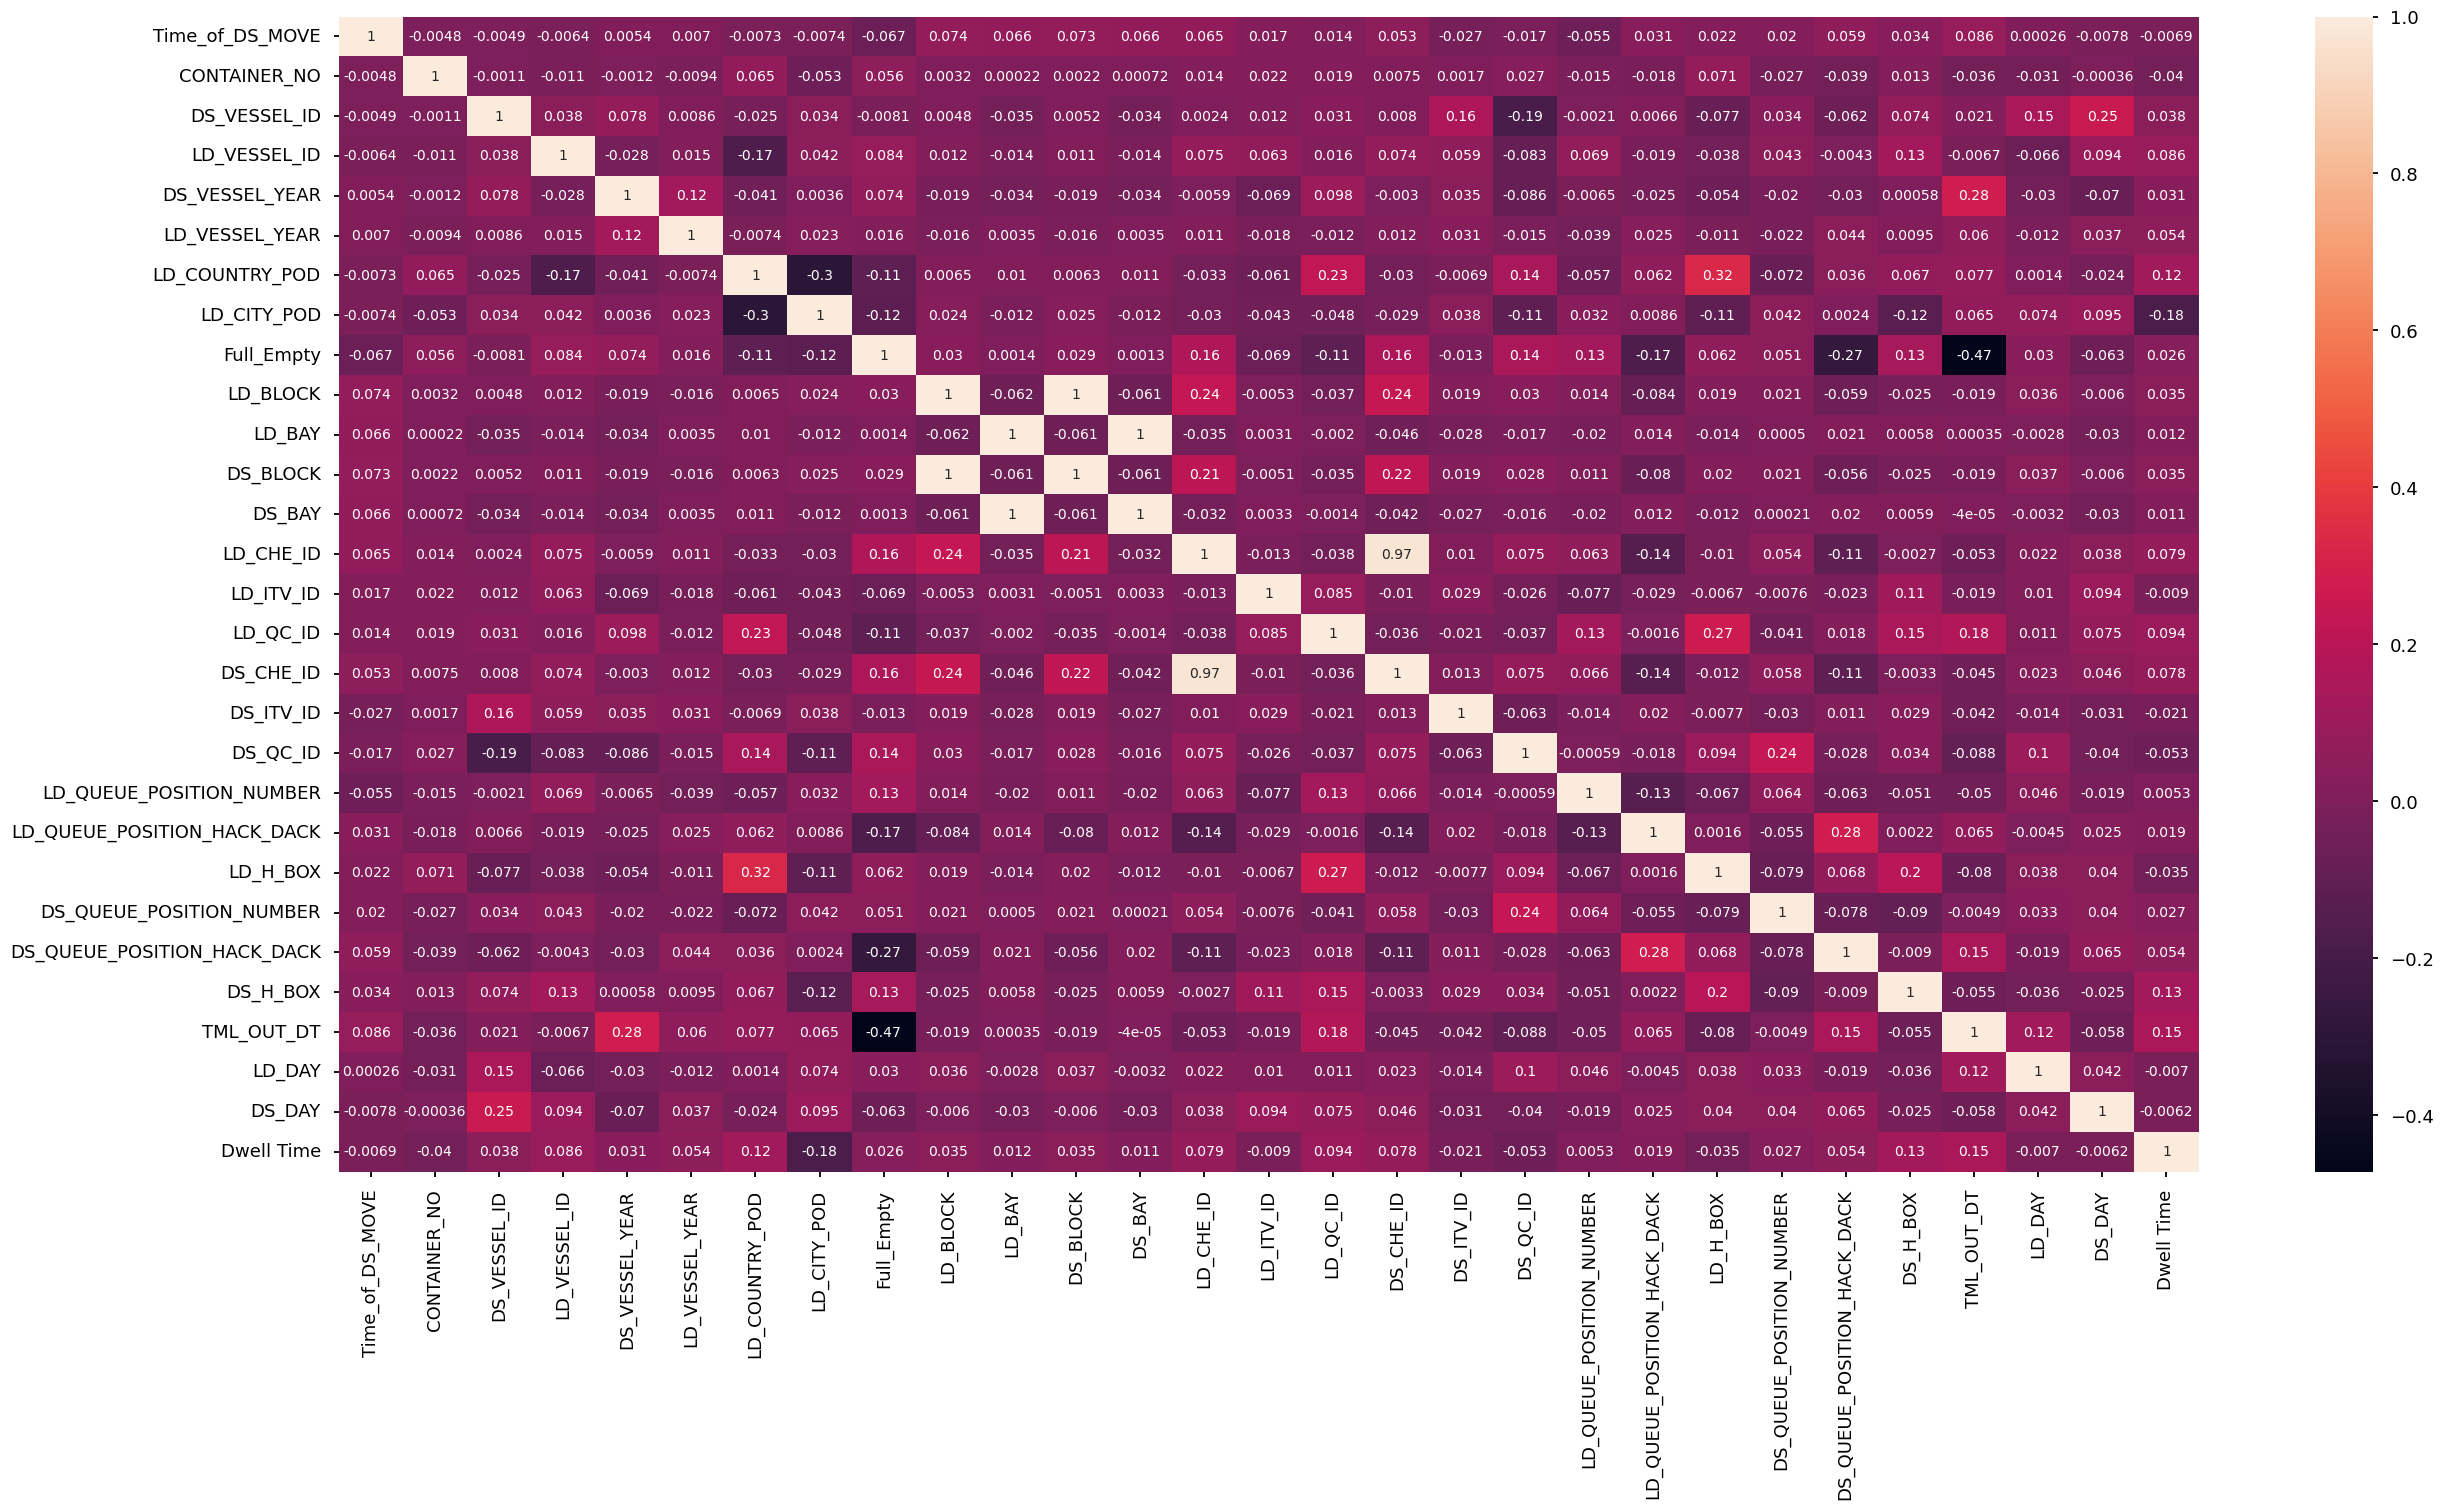

In [41]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [42]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=120)

# 랜덤포레스트 모델 생성
tRF = RandomForestRegressor()
tRF.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error 

# MAE 측정
# MAE_train
y_pred_train = tRF.predict(X_train)
y_pred_test = tRF.predict(X_test)


mae_train = mean_absolute_error(y_train,y_pred_train)
mae_test = mean_absolute_error(y_test,y_pred_test)
print('train_MAE: ',mae_train)
print('test_MAE: ',mae_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train MSE : ", mse_train)
print("Train RMSE : ", mse_train**0.5)
print("Test MSE : ", mse_test)
print("Test RMSE : ", mse_test**0.5)

r2 = r2_score(y_test, tRF.predict(X_test))
print('테스트 결정계수(R2, 설명력) :', r2)     

train_MAE:  3815.8092948267204
test_MAE:  9985.360052229811
Train MSE :  198195474.8149627
Train RMSE :  14078.19146108486
Test MSE :  1967619410.3328202
Test RMSE :  44357.856241401256
테스트 결정계수(R2, 설명력) : 0.9776275538351765


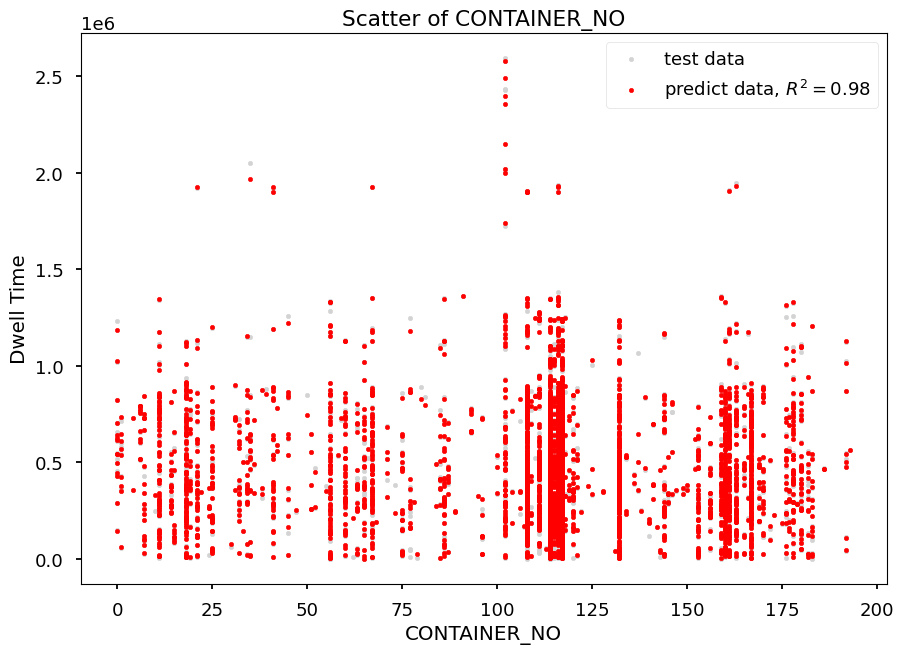

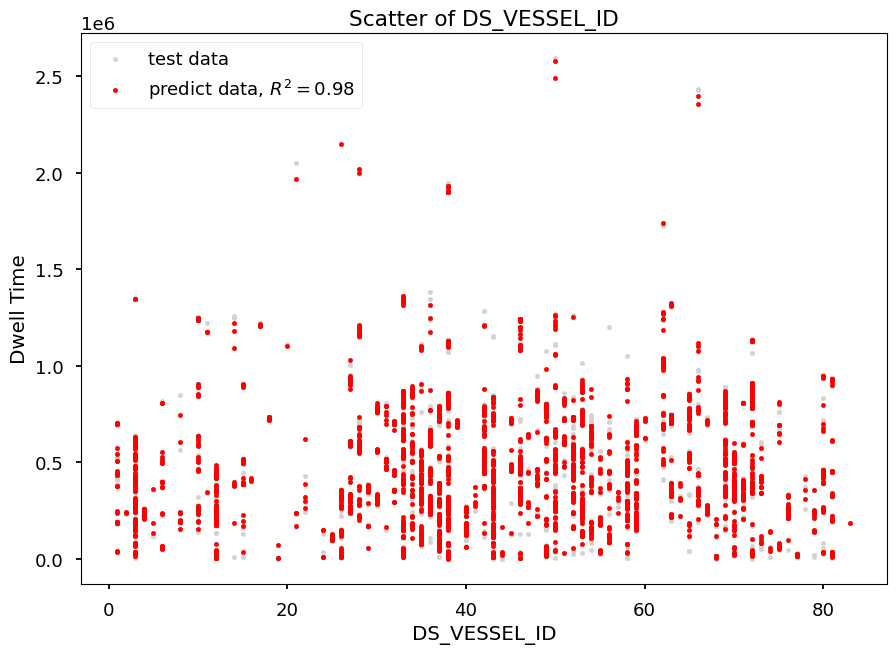

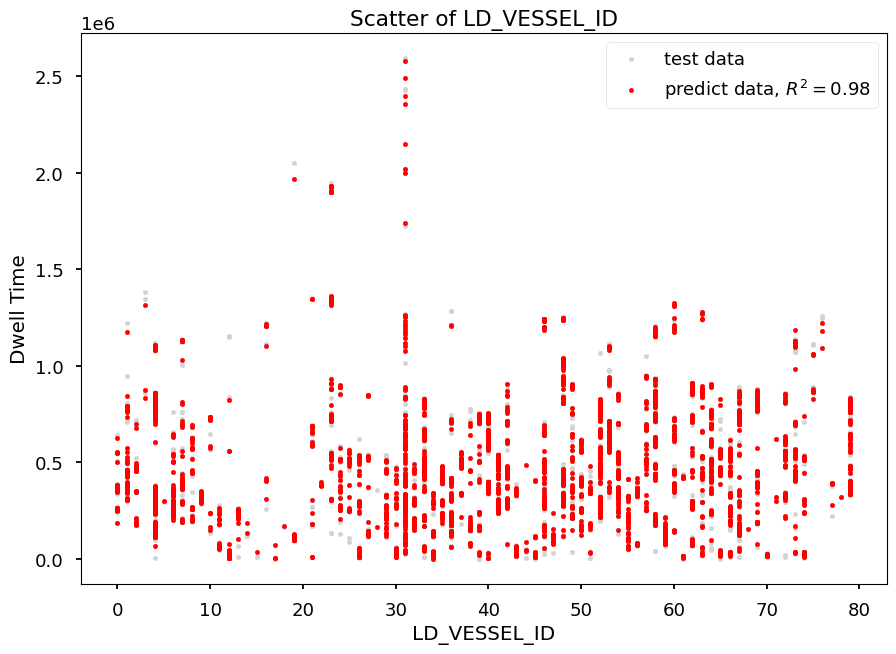

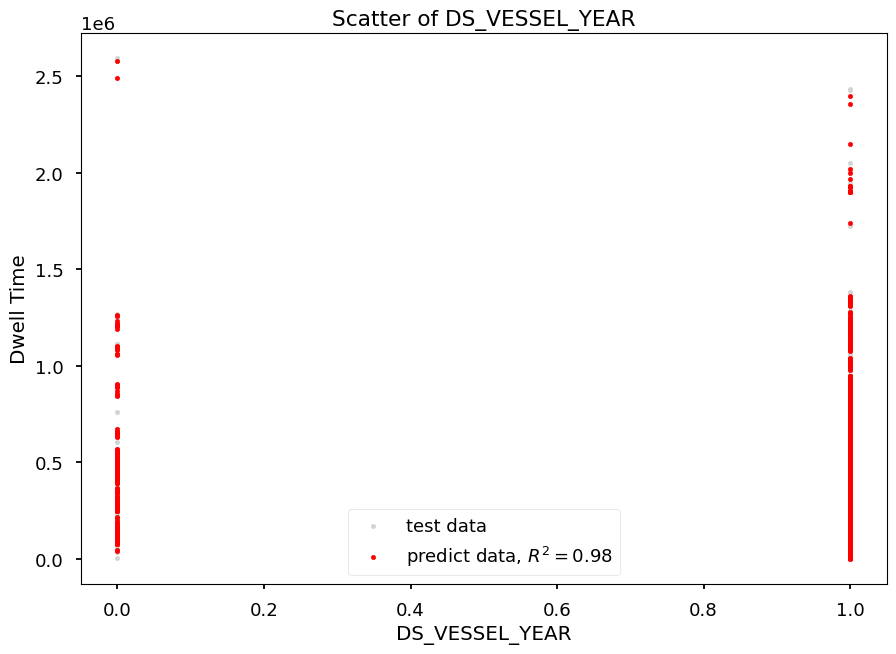

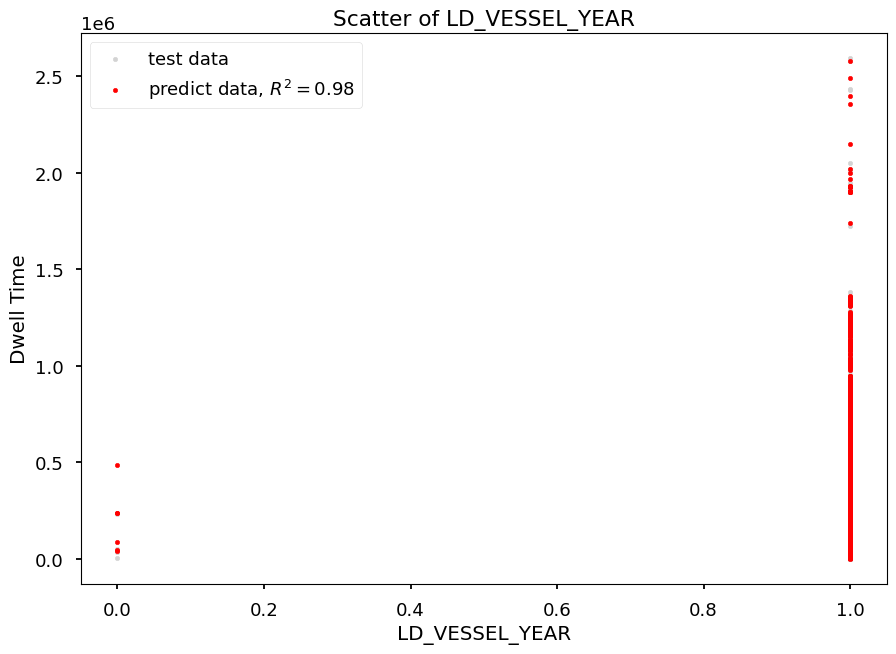

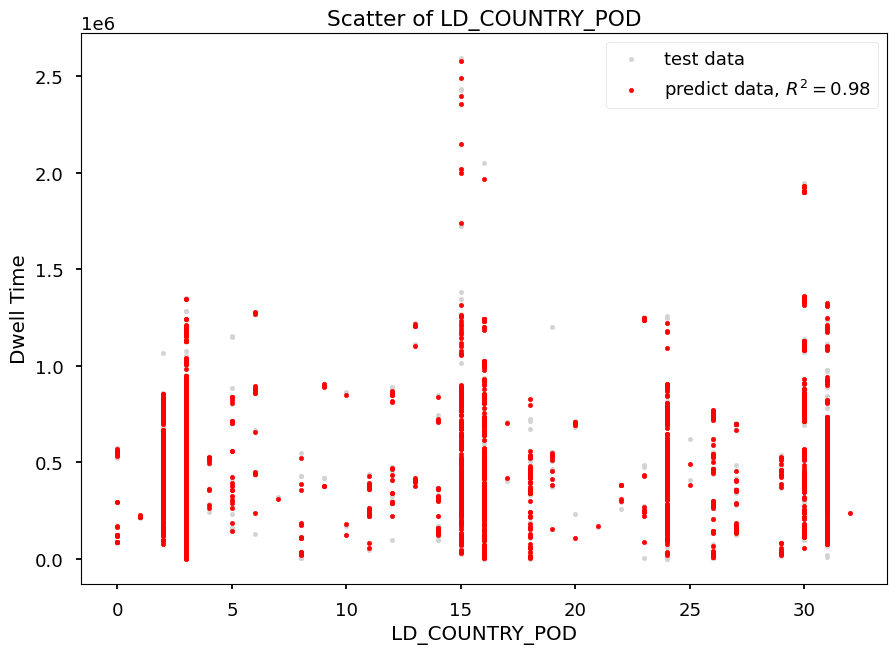

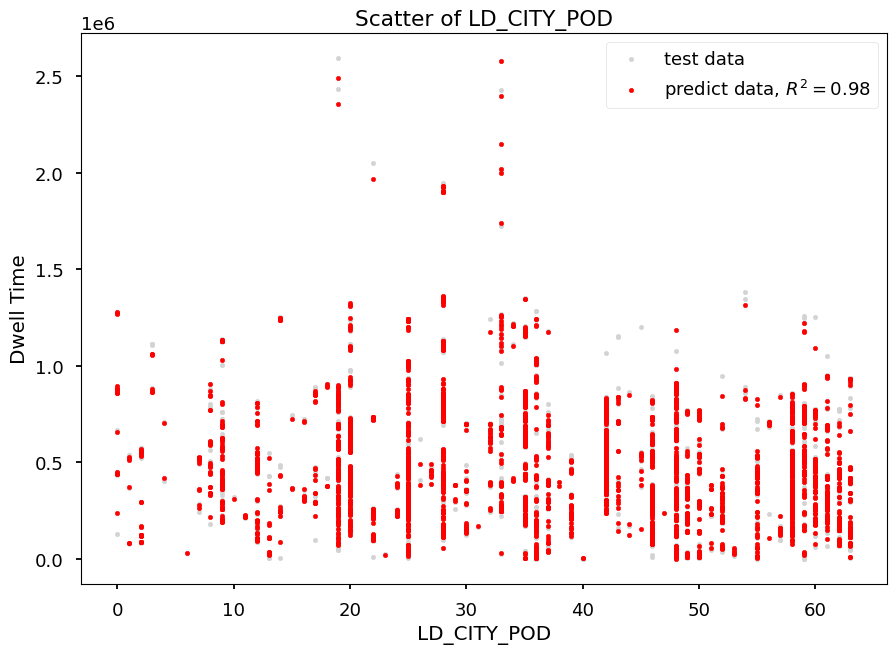

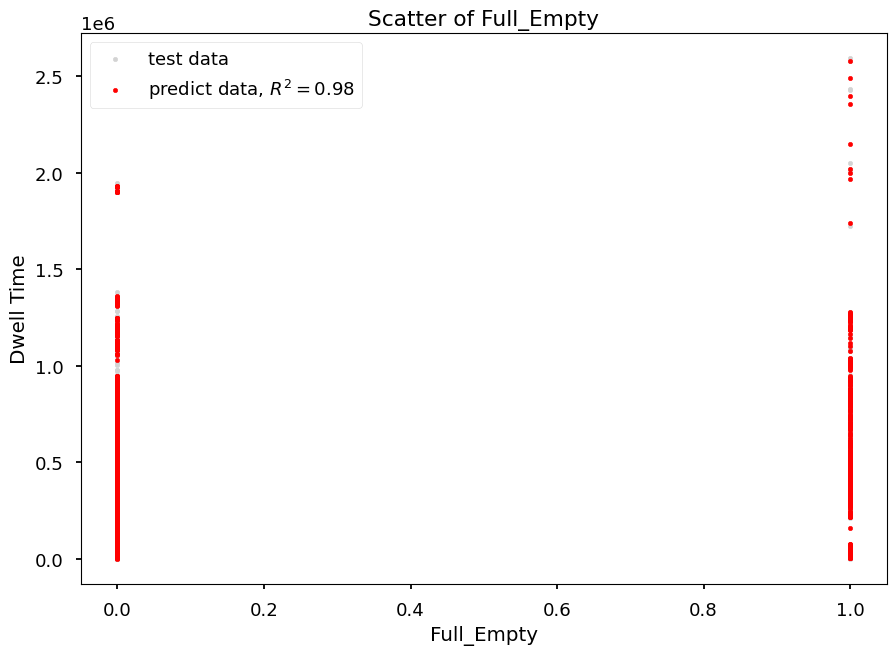

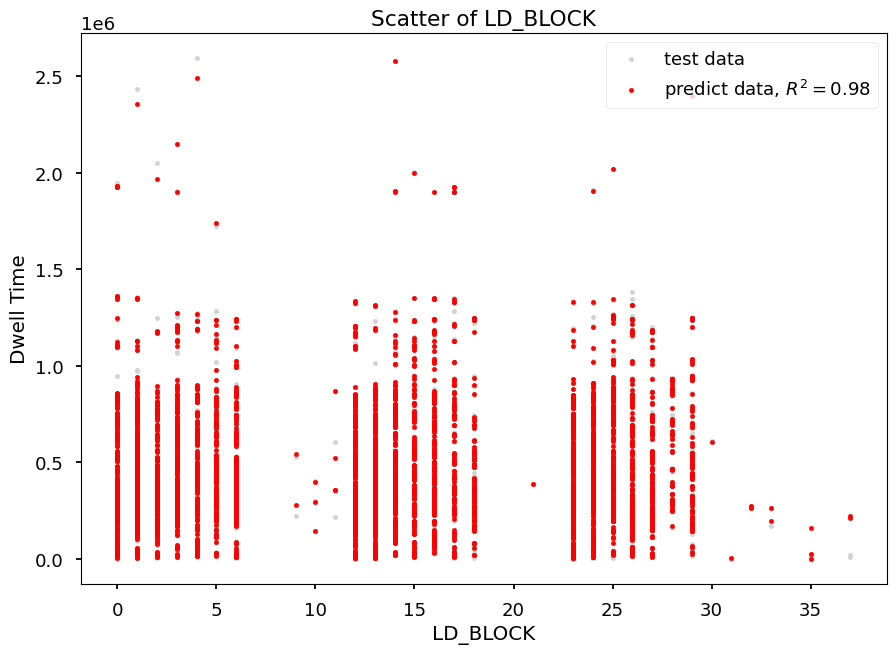

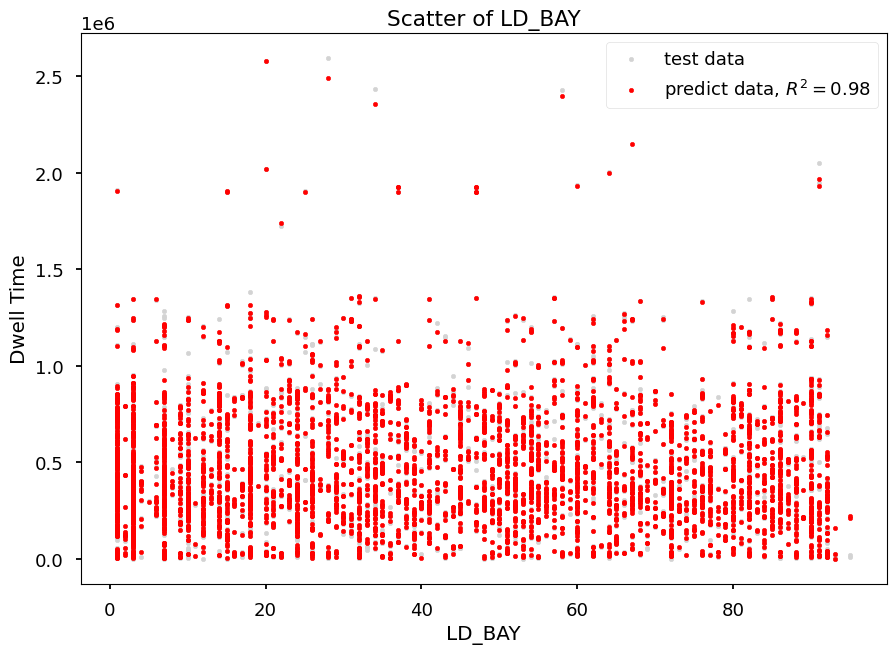

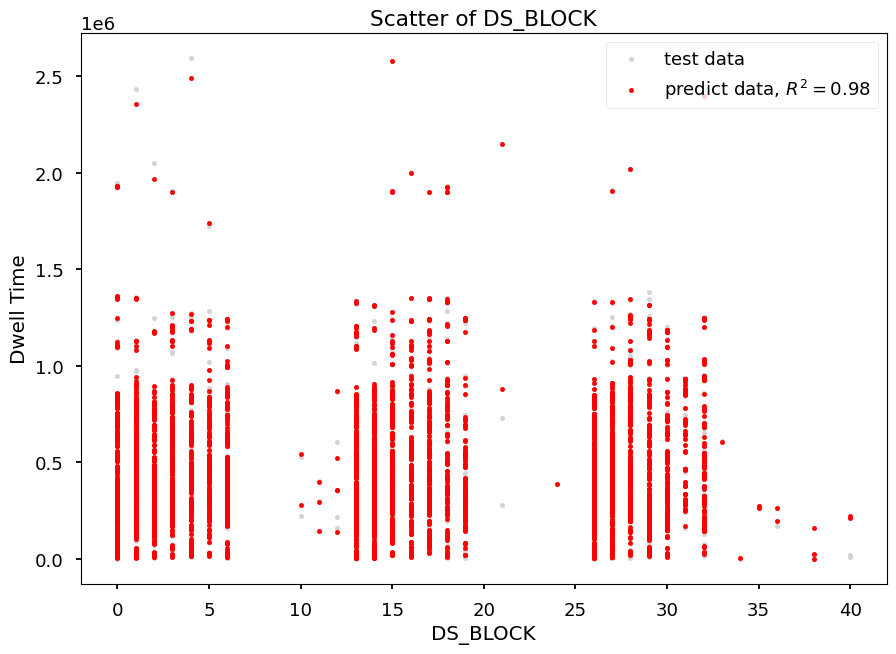

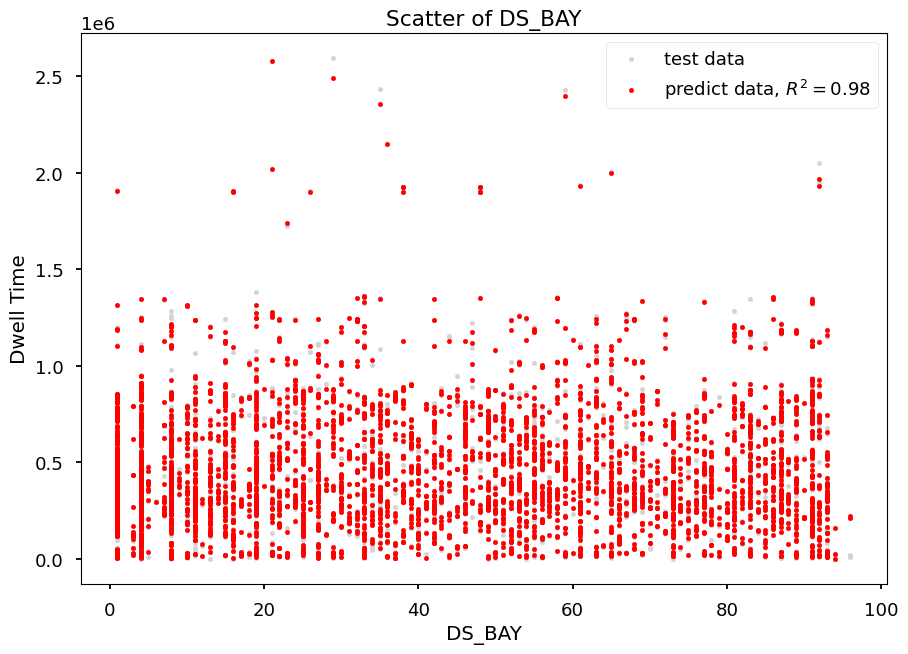

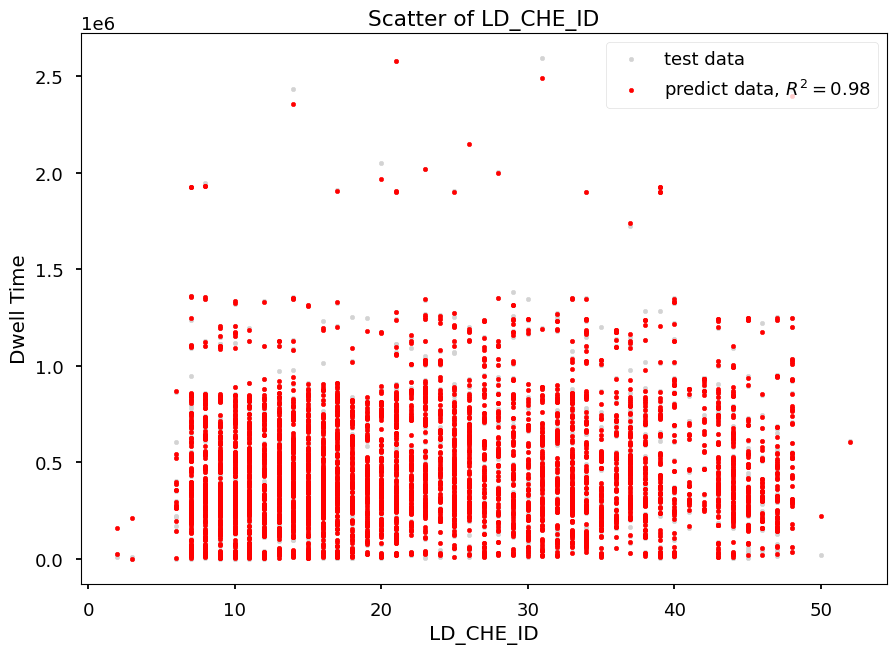

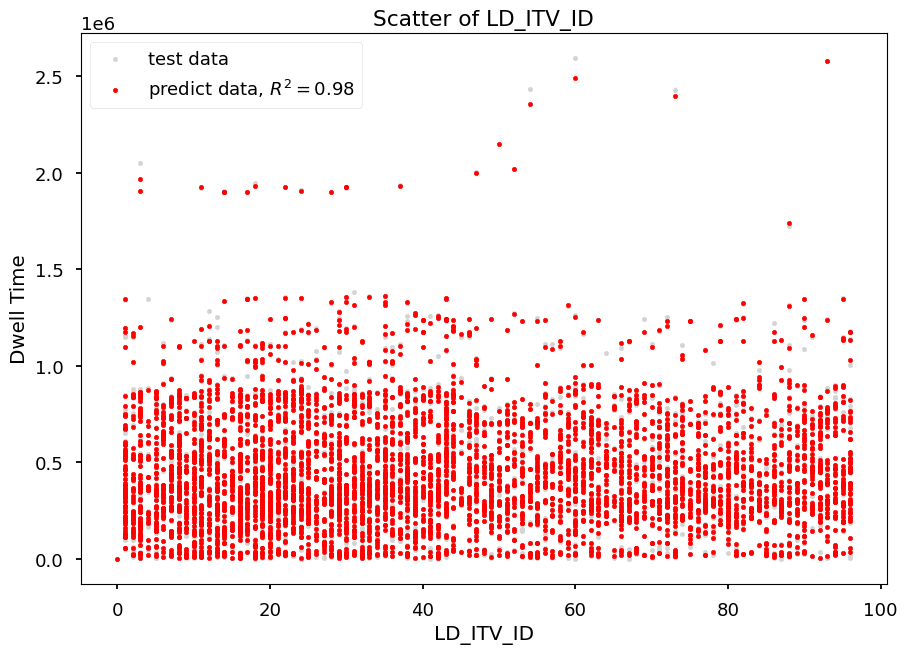

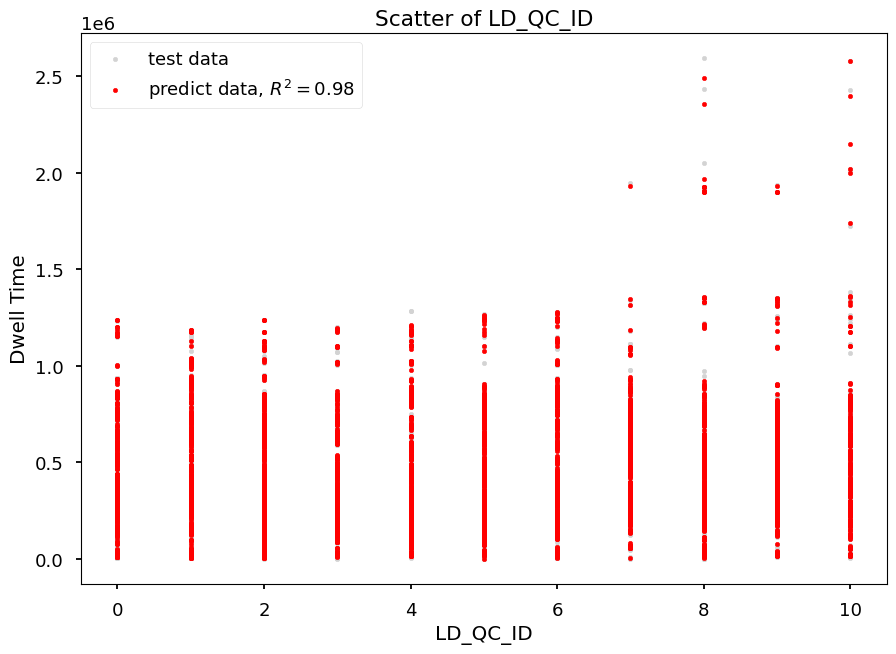

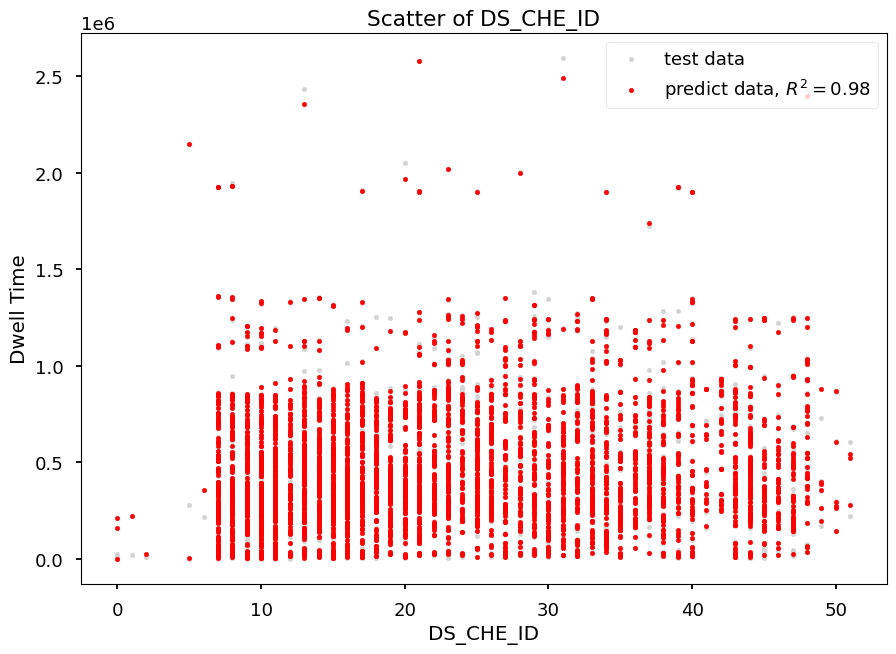

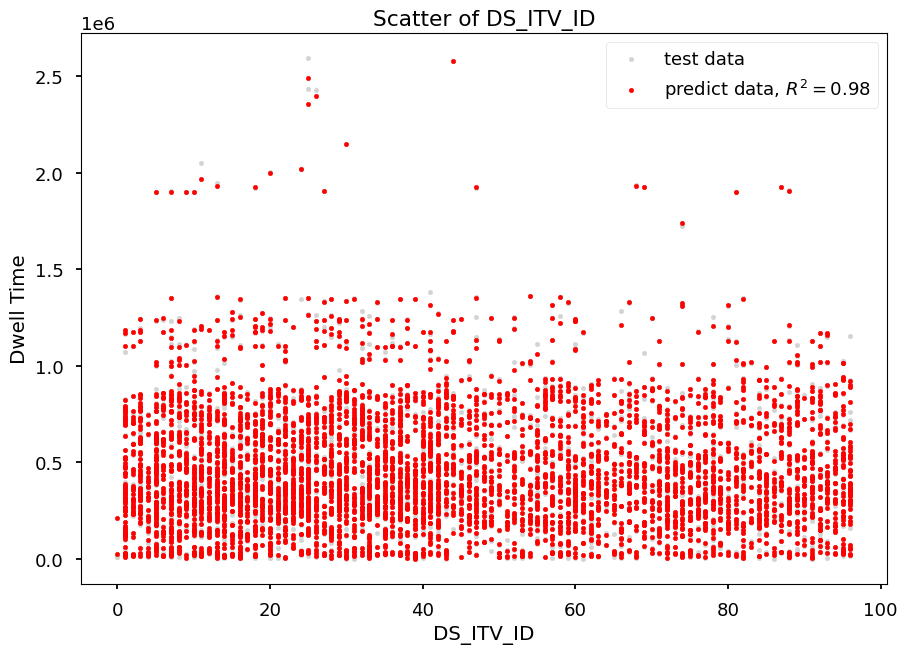

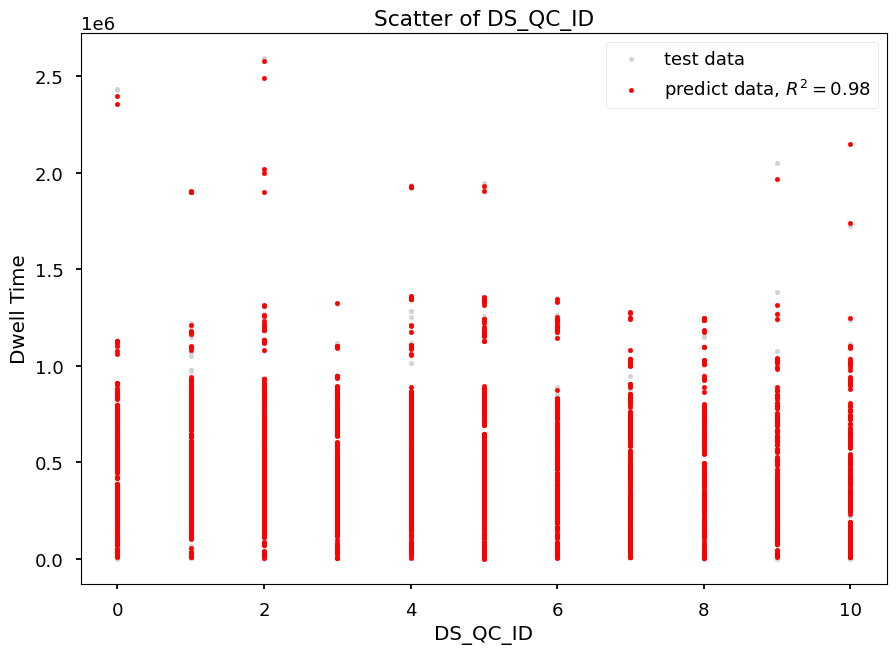

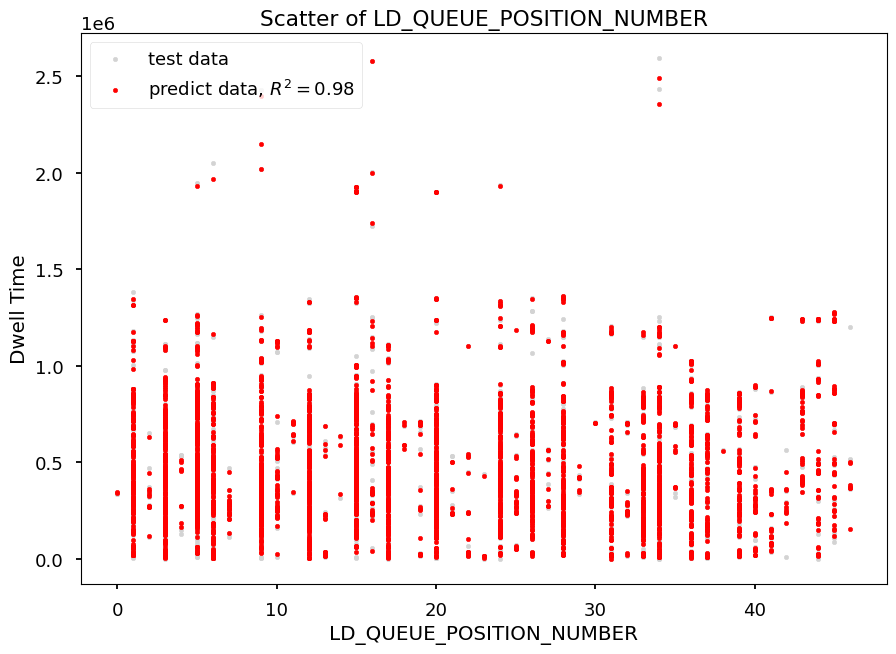

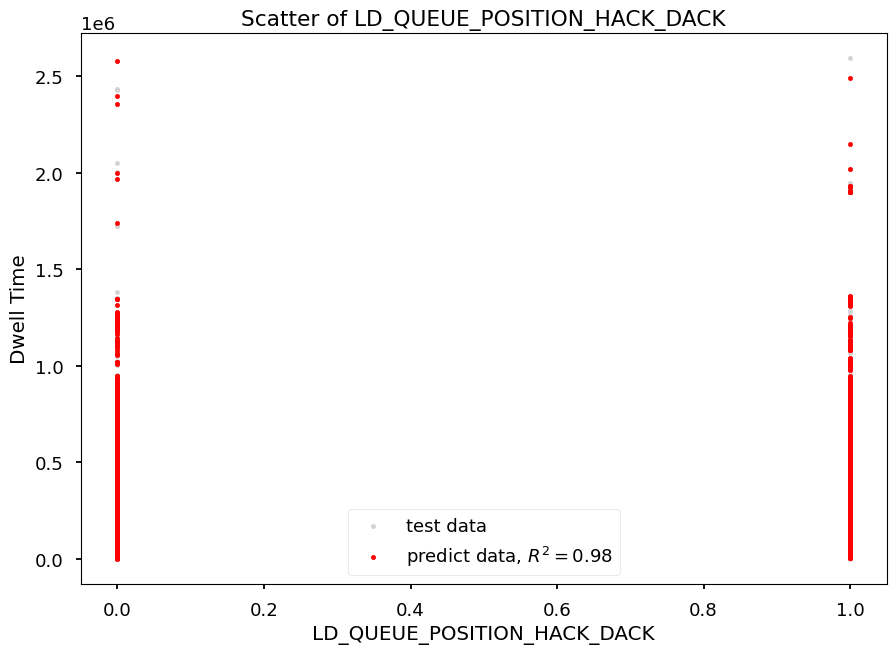

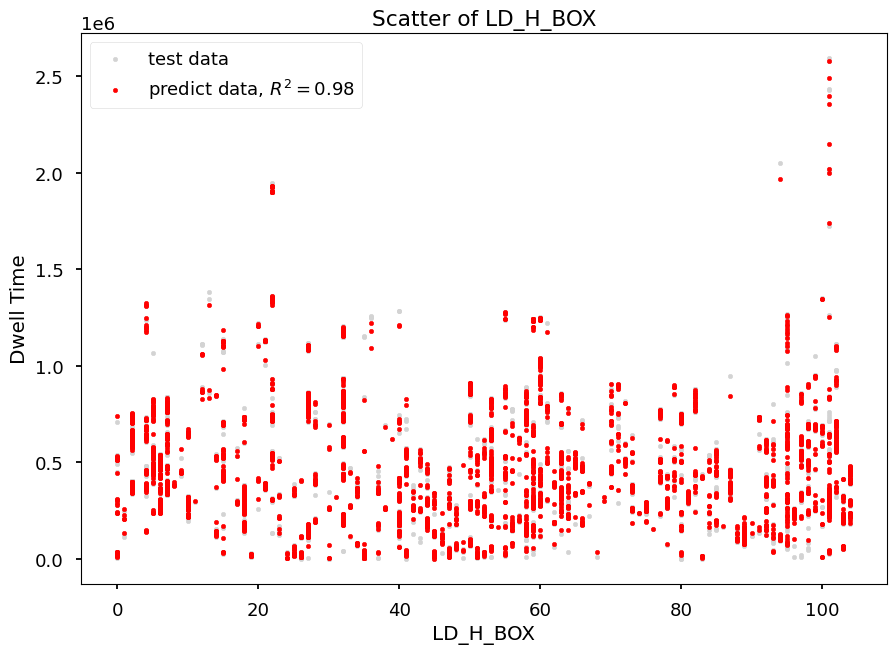

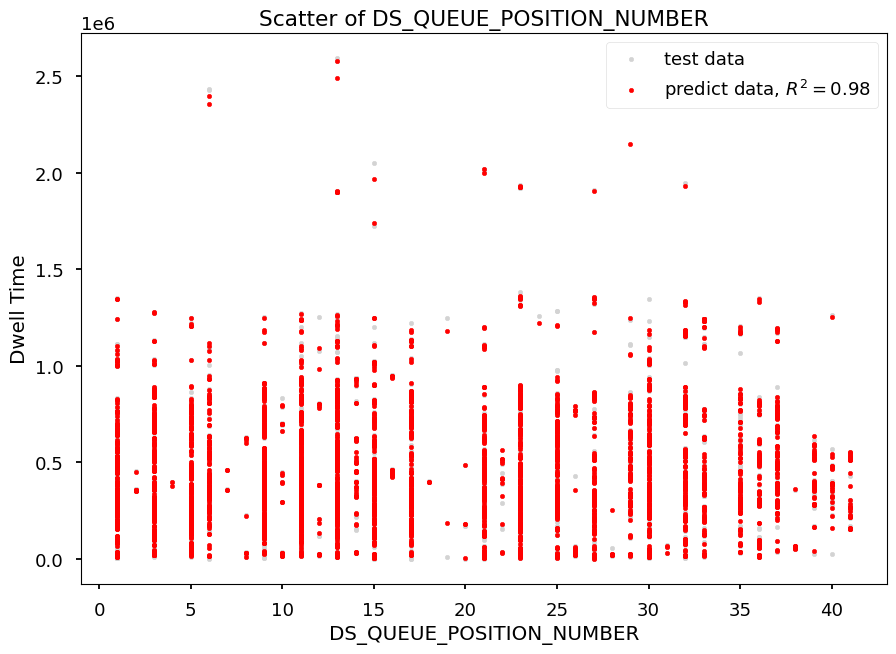

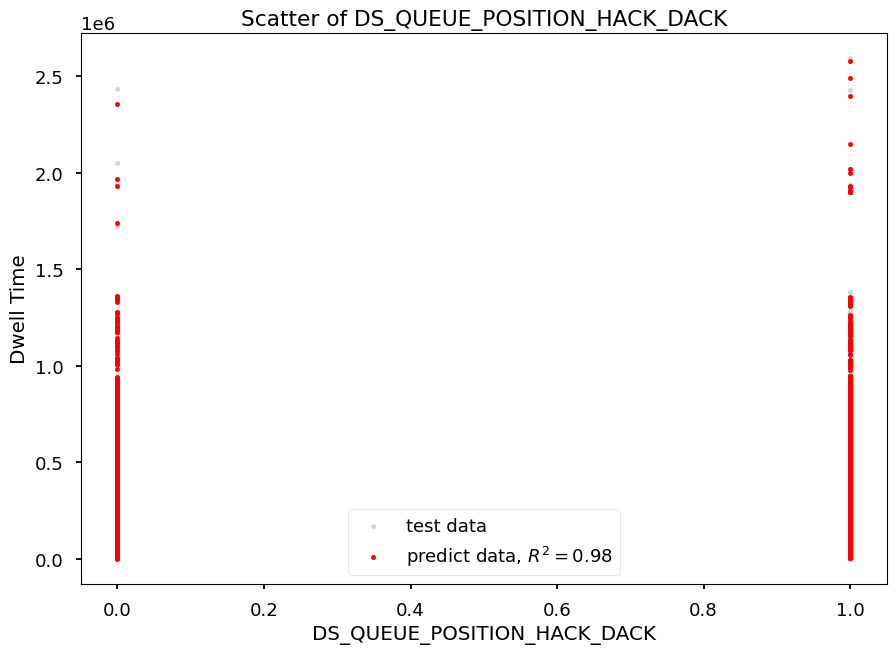

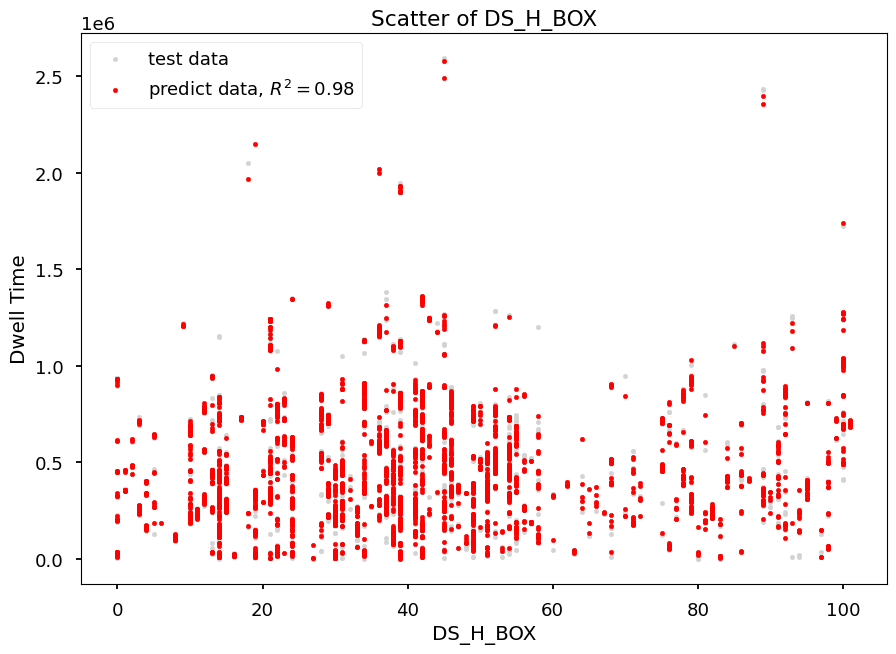

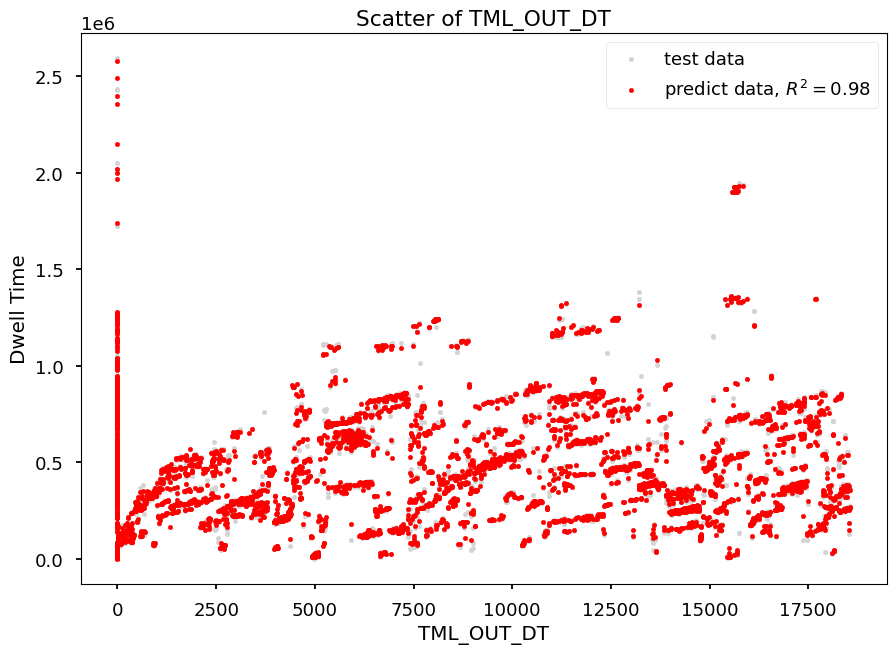

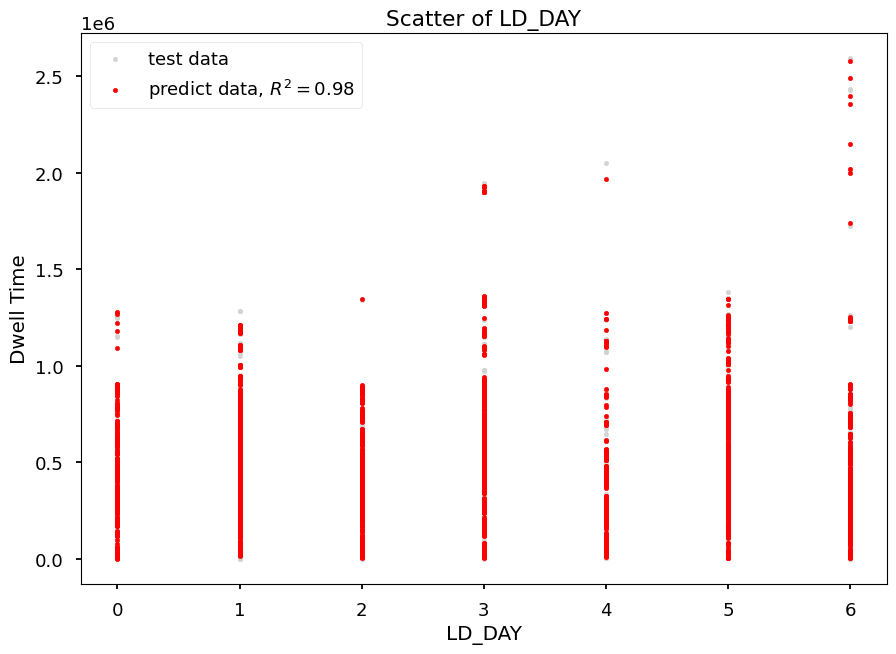

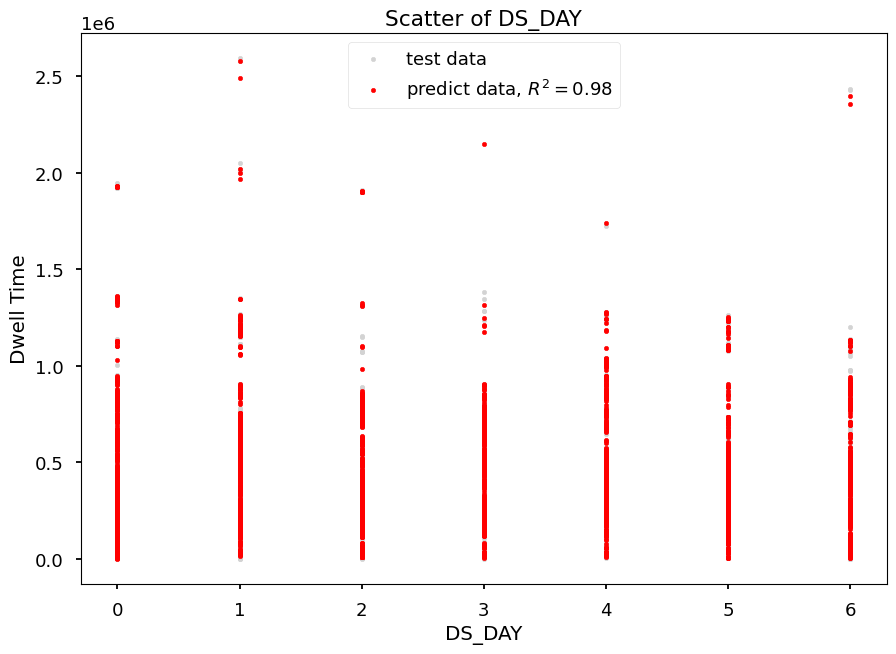

In [43]:
from matplotlib import style 
style.use('seaborn-talk')
for feature in features :
    plt.scatter(X_test[feature], y_test, c='lightgray', label='test data', s = 10)
    plt.scatter(X_test[feature], tRF.predict(X_test), c='r', label='predict data, $R^2=%.2f$'%r2, s = 10)
    plt.xlabel(feature)
    plt.title('Scatter of ' + feature)
    plt.ylabel('Dwell Time')
    plt.legend()
    plt.show()

In [44]:
# 변수중요도
imp = tRF.feature_importances_
imp



array([1.22350765e-03, 1.82661082e-03, 1.26211235e-01, 7.03616140e-02,
       8.05919301e-03, 8.53442933e-05, 1.21694015e-02, 1.13835433e-01,
       4.27457103e-02, 1.14974459e-03, 9.86911348e-04, 1.27599802e-03,
       1.11574386e-03, 2.34140583e-03, 1.49498160e-03, 5.21521663e-02,
       1.77033921e-03, 2.35817130e-03, 1.89807411e-02, 2.86800498e-03,
       8.53932812e-04, 1.12149829e-01, 1.64578895e-02, 5.59352172e-04,
       1.80973655e-01, 1.57291142e-01, 2.55423011e-02, 4.31596407e-02])

([<matplotlib.axis.YTick at 0x1ec6c5775b0>,
 [Text(0, 0, 'Time_of_DS_MOVE'),
  Text(0, 1, 'CONTAINER_NO'),
  Text(0, 2, 'DS_VESSEL_ID'),
  Text(0, 3, 'LD_VESSEL_ID'),
  Text(0, 4, 'DS_VESSEL_YEAR'),
  Text(0, 5, 'LD_VESSEL_YEAR'),
  Text(0, 6, 'LD_COUNTRY_POD'),
  Text(0, 7, 'LD_CITY_POD'),
  Text(0, 8, 'Full_Empty'),
  Text(0, 9, 'LD_BLOCK'),
  Text(0, 10, 'LD_BAY'),
  Text(0, 11, 'DS_BLOCK'),
  Text(0, 12, 'DS_BAY'),
  Text(0, 13, 'LD_CHE_ID'),
  Text(0, 14, 'LD_ITV_ID'),
  Text(0, 15, 'LD_QC_ID'),
  Text(0, 16, 'DS_CHE_ID'),
  Text(0, 17, 'DS_ITV_ID'),
  Text(0, 18, 'DS_QC_ID'),
  Text(0, 19, 'LD_QUEUE_POSITION_NUMBER'),
  Text(0, 20, 'LD_QUEUE_POSITION_HACK_DACK'),
  Text(0, 21, 'LD_H_BOX'),
  Text(0, 22, 'DS_QUEUE_POSITION_NUMBER'),
  Text(0, 23, 'DS_QUEUE_POSITION_HACK_DACK'),
  Text(0, 24, 'DS_H_BOX'),
  Text(0, 25, 'TML_OUT_DT'),
  Text(0, 26, 'LD_DAY'),
  Text(0, 27, 'DS_DAY')])

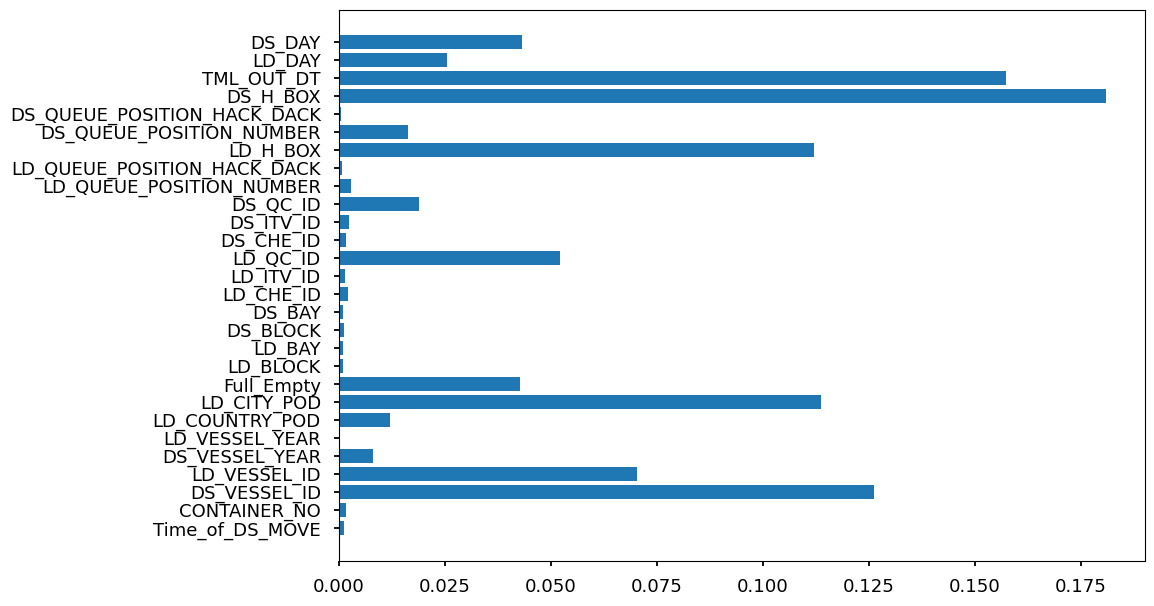

In [45]:
len(imp)
colnames = tRF.feature_names_in_
colnames
import matplotlib.pyplot as plt
plt.barh(range(len(imp)), imp)
plt.yticks(range(len(imp)), colnames)

In [46]:


# PDP
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from matplotlib import pyplot as plt


feature_list = list(X.columns)
for feature in feature_list :
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_partial_dependence(estimator=tRF,X=X,features=[feature],grid_resolution=round(X.shape[0]*0.5),percentiles=(0, 1),kind='average', method='brute')


c:\Users\hyunj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
